<a href="https://colab.research.google.com/github/ihedges9/Python-Projects/blob/main/475_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a CNN model to predict the class of digit.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it.

In [16]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

### Reshape and normalize the features

In [17]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train_pre.reshape(X_train_pre.shape[0], img_rows, img_cols, 1)
X_test = X_test_pre.reshape(X_test_pre.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 28, 28, 1)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [18]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

## Convolution Model (ReLU, 5x5 kernel, pooling)

In [19]:
model1 = keras.Sequential()
model1.add(layers.Input(X_train.shape[1:]))
model1.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Conv2D(filters = 20, kernel_size=(5, 5), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(100, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [20]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          32,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# use validation_split argument to do train-validation split
history = model1.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - accuracy: 0.7539 - loss: 0.8226 - val_accuracy: 0.9620 - val_loss: 0.1245
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9651 - loss: 0.1179 - val_accuracy: 0.9751 - val_loss: 0.0793
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9760 - loss: 0.0746 - val_accuracy: 0.9756 - val_loss: 0.0800
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.9803 - loss: 0.0625 - val_accuracy: 0.9829 - val_loss: 0.0570
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 76ms/step - accuracy: 0.9846 - loss: 0.0502 - val_accuracy: 0.9836 - val_loss: 0.0543
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.9872 - loss: 0.0402 - val_accuracy: 0.9872 - val_loss: 0.0459
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9900 - loss: 0.0327 - val_accuracy: 0.9864 - val_loss: 0.0478
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9905 - loss: 0.0302 - 

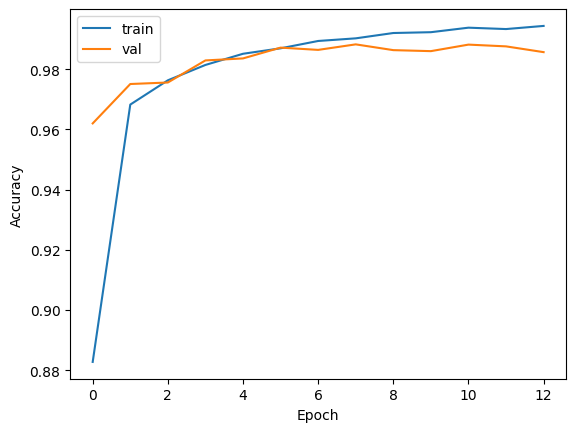

In [22]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

In [23]:
_, acc = model1.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.78%


## Convolution Model (with larger kernel and softplus activation)

In [26]:
model2 = keras.Sequential()
model2.add(layers.Input(X_train.shape[1:]))
model2.add(layers.Conv2D(filters = 10, kernel_size=(7, 7), activation='softplus'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(filters = 20, kernel_size=(7, 7), activation='softplus'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(100, activation='softplus'))
model2.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [28]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 10)          │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 11, 11, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 5, 5, 20)            │           9,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │           8,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,430 (75.90 KB)

 Trainable params: 19,430 (75.90 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# use validation_split argument to do train-validation split
history = model2.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.3639 - loss: 1.7936 - val_accuracy: 0.9313 - val_loss: 0.2402
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9266 - loss: 0.2446 - val_accuracy: 0.9467 - val_loss: 0.1826
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.9506 - loss: 0.1576 - val_accuracy: 0.9648 - val_loss: 0.1230
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9636 - loss: 0.1180 - val_accuracy: 0.9635 - val_loss: 0.1193
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 83ms/step - accuracy: 0.9683 - loss: 0.1000 - val_accuracy: 0.9742 - val_loss: 0.0862
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.9735 - loss: 0.0870 - val_accuracy: 0.9766 - val_loss: 0.0826
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9787 - loss: 0.0716 - val_accuracy: 0.9758 - val_loss: 0.0831
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9798 - loss: 0.0695 - 

In [30]:
_, acc = model2.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.63%


## 30 epochs, 64 batch size, patience of 3, mixed activation, RMSprop, validation 0.3, 3x3 kernel, 0.005 learning


In [31]:
model3 = keras.Sequential()
model3.add(layers.Input(X_train.shape[1:]))
model3.add(layers.Conv2D(filters = 10, kernel_size=(3, 3), activation='relu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Conv2D(20, (3, 3), activation='elu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Conv2D(20, (3, 3), activation='tanh'))
model3.add(layers.Flatten())
model3.add(layers.Dense(100, activation='selu'))
model3.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.RMSprop(0.005)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [32]:
model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 11, 11, 20)          │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 3, 3, 20)            │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 180)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          18,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,650 (96.29 KB)

 Trainable params: 24,650 (96.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
EPOCHS3 = 30
BATCH3 = 64
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# use validation_split argument to do train-validation split
history = model3.fit(X_train, y_train,
                    batch_size=BATCH3, epochs=EPOCHS3,
                    validation_split = 0.3, verbose=1,
                    callbacks=[early_stop])

Epoch 1/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.8798 - loss: 0.3691 - val_accuracy: 0.9441 - val_loss: 0.2018
Epoch 2/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.9719 - loss: 0.0939 - val_accuracy: 0.9771 - val_loss: 0.0853
Epoch 3/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.9793 - loss: 0.0678 - val_accuracy: 0.9710 - val_loss: 0.1122
Epoch 4/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.9838 - loss: 0.0556 - val_accuracy: 0.9796 - val_loss: 0.0865
Epoch 5/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9867 - loss: 0.0478 - val_accuracy: 0.9799 - val_loss: 0.0975


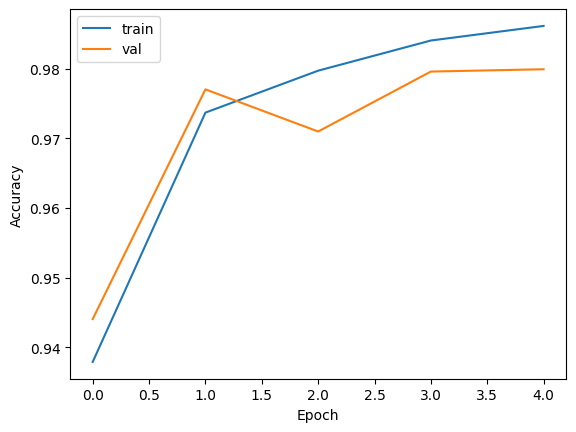

In [34]:
plot_history(history)

In [35]:
_, acc = model3.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.28%


## Performance ##
Model 1: 98.78% test accuracy

Model 2: 98.63% test accuracy

Model 3: 98.28% test accuracy

## Recommendations ##

There is a very small difference in accuracy (0.50% between the min and max) between the three models above. Model 3 runs much quicker than the other two models, so if runtime or efficiency was a significant factor in deciding between models, I would suggest model 3. Model 3 only took 5 epochs (which took around 2 minutes and 30 seconds) and converged much quicker in compariosn to Model 1 (13 epochs, approximately 8 minutes) and Model 3 (25 epochs, approx. 13 minutes).